# Experimental validations of the immune checkpoint logical model with in silico experiments

In [1]:
# Set up working environment for CoLoMoTo
import ginsim
import biolqm
import maboss
from colomoto_jupyter import tabulate # for fixpoint table display
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states

## Load the model

In [2]:
# Set up the required files
bnd_file ="supp_mat_model.bnd"
cfg_WT = "supp_mat_model.bnd.cfg"

# Load the Wild-Type model
WT1 = maboss.load(bnd_file, cfg_WT)

## Experimental validation: Cancer Cell 2013

We simulated conditions of published experimental results that were done on CD4+ or CD8+ cells to simulate the treatments with our model. Here is an example below from the article from Duraiswamy et al. (Cancer Cell 2013) 

#### Effect of PD1 blockade in CD8+ PD1+ CTLA4+ cells (PMID: 23633484)

Text(0.5, 1.0, 'CD8 cells with PD1L and CD80/86 present - PD1 OFF')

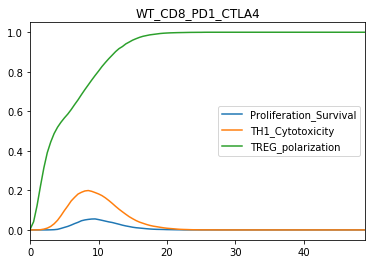

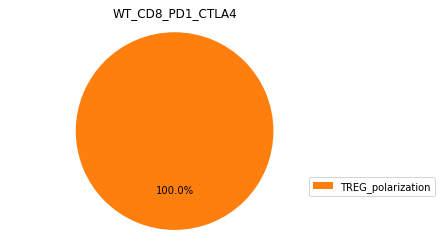

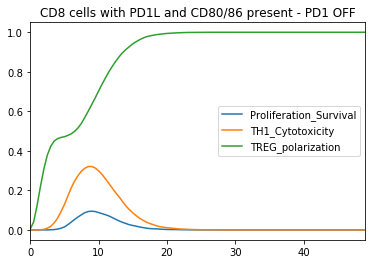

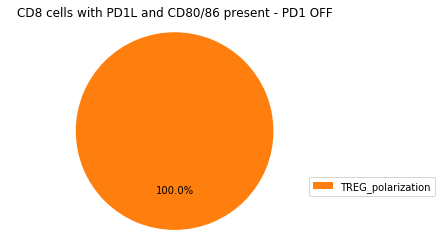

In [3]:
WT_IC = maboss.copy_and_update_parameters(WT1, {'max_time':50})
    
WT_IC.network.set_istate('Antigen',[0,1])
WT_IC.network.set_istate('MHCII',[1,0])
WT_IC.network.set_istate('MHCI',[0,1])
WT_IC.network.set_istate('CD80_86',[0,1])

WT_IC.network.set_istate('TIM3_L',[1,0])
WT_IC.network.set_istate('LAG3',[1,0])
WT_IC.network.set_istate('TIGIT_L',[1,0])
WT_IC.network.set_istate('PD1_L',[0,1])

WT_IC.network.set_istate('TNFRs_L',[1,0])
WT_IC.network.set_istate('ICOS_L',[1,0]) 
#WT_IC.network.set_istate('TNFRs_L',[0,1])
#WT_IC.network.set_istate('ICOS_L',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisatiOFF of the results
WT_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT_IC = WT_IC.run()

# Plot the results of the WT simulation
run_WT_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_CD8_PD1_CTLA4')
run_WT_IC.plot_piechart()
plt.title('WT_CD8_PD1_CTLA4')


# Mutate PD1 in cells not expressing any ligands
mut_PD1_OFF = maboss.copy_and_update_parameters(WT_IC, {'max_time':50})

mut_PD1_OFF.mutate("PD1", "OFF")
mutres_PD1_OFF = mut_PD1_OFF.run()
mutres_PD1_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells with PD1L and CD80/86 present - PD1 OFF')
mutres_PD1_OFF.plot_piechart()
plt.title('CD8 cells with PD1L and CD80/86 present - PD1 OFF')

Conclusion: the results are in accordance with results reported in the literature that show no effect of anti-PD1 treatments in CD8+ cells expressing the corresponding ligands of CTLA4 and PD1.

We tested the effect of the anti-PD1 anti-CTLA4 combined therapies in CD8+ CTLA4+ PD1+ cells

Text(0.5, 1.0, 'CD8 cells with PD1L and CD80/86 present - PD1 and CTLA4 OFF')

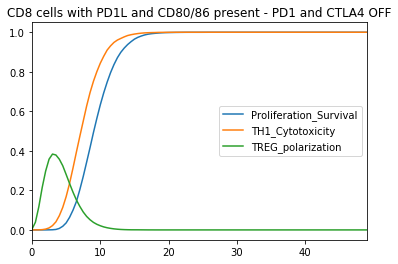

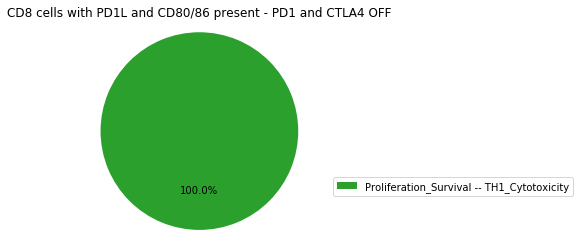

In [4]:
mut_CTLA4_PD1_OFF = maboss.copy_and_update_parameters(mut_PD1_OFF, {'max_time':50})

mut_CTLA4_PD1_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_PD1_OFF = mut_CTLA4_PD1_OFF.run()
mutres_CTLA4_PD1_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells with PD1L and CD80/86 present - PD1 and CTLA4 OFF')
mutres_CTLA4_PD1_OFF.plot_piechart()and CTLA4 
plt.title('CD8 cells with PD1L and CD80/86 present - PD1 and CTLA4 OFF')

Results: we confirm that the double treatment leads to good outcome

## Experimental validation: Cancer Cell 2019

Note: all simulations will done in CD8+ T cells

### General CD8+ cells

We recall here the results that we obtain with the model for CD8+ cells with and without the presence of ligands 

#### 1. Simulation of the cell conditions before treatment for non-responders in CD8+ cells

In [5]:
### Simulation of the experiments for non-responders
WT_nonresp = maboss.copy_and_update_parameters(WT1, {'max_time':50})

WT_nonresp.network.set_istate('Antigen',[0,1])
WT_nonresp.network.set_istate('MHCI',[0,1])
WT_nonresp.network.set_istate('MHCII',[1,0])
WT_nonresp.network.set_istate('CD80_86',[1,0])

WT_nonresp.network.set_istate('TIM3_L',[0,1])
WT_nonresp.network.set_istate('LAG3_L',[0,1])
WT_nonresp.network.set_istate('TIGIT_L',[0,1])
WT_nonresp.network.set_istate('PD1_L',[0,1])
WT_nonresp.network.set_istate('TNFRs_L',[0,1])
WT_nonresp.network.set_istate('ICOS_L',[0,1])


Text(0.5, 1.0, 'CD8 cells - non responders - before treatment')

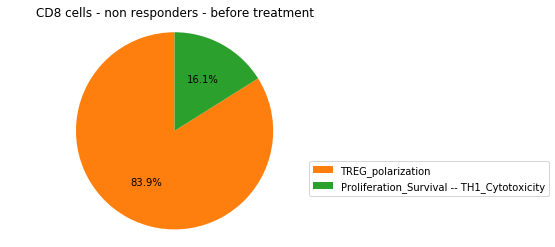

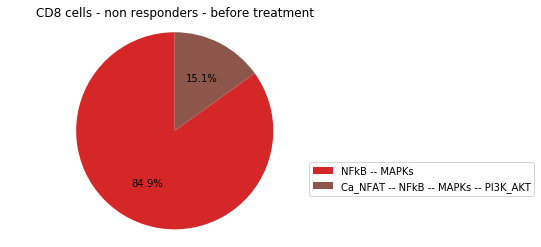

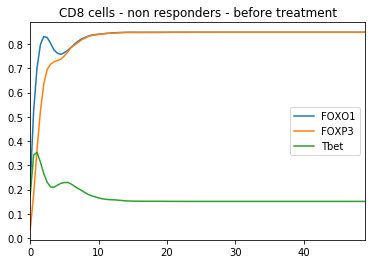

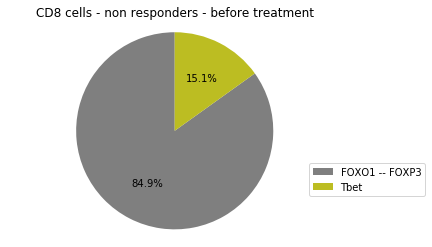

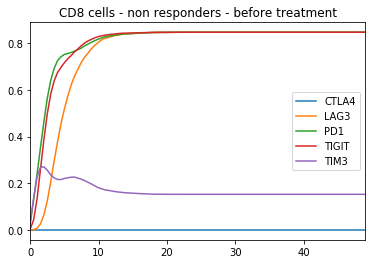

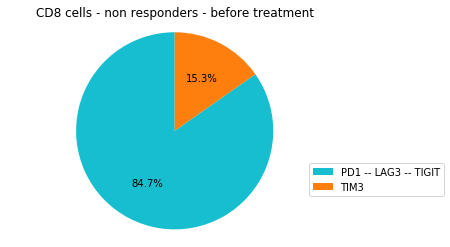

In [9]:
##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
#run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD8 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD8 cells - non responders - before treatment')

##### Visualize the pathways
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
#run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD8 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD8 cells - non responders - before treatment')

##### Visualize the TFs
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('Tbet','FOXP3','FOXO1'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD8 cells - non responders - before treatment')

##### Visualize the immune checkpoints
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('CTLA4','PD1','TIGIT','LAG3','TIM3'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD8 cells - non responders - before treatment')


Results: the proportion of Th1 cells is about 15% for these patients

#### 2. Simulation of the cell conditions before treatment for responders in CD8+ cells

In [7]:
### Simulation of experiments for responders
WT_resp = maboss.copy_and_update_parameters(WT1, {'max_time':50})

# For all nodes of the network, set the initial state to random
#for n in WT_resp.network:
#    WT_resp.network.set_istate(n,[0.5,0.5])

# Ligands ON
WT_resp.network.set_istate('Antigen',[0,1])
WT_resp.network.set_istate('MHCI',[0,1])

# Ligands OFF
WT_resp.network.set_istate('MHCII',[1,0])

WT_resp.network.set_istate('CD80_86',[1,0])
WT_resp.network.set_istate('TIM3_L',[1,0])
WT_resp.network.set_istate('LAG3_L',[0,1])
#WT_resp.network.set_istate('TIGIT_L',[1,0])
#WT_resp.network.set_istate('TIGIT_L',[0,1])
WT_resp.network.set_istate('TIGIT',[0,1])
WT_resp.network.set_istate('PD1_L',[0,1])
WT_resp.network.set_istate('PD1',[0,1])
WT_resp.network.set_istate('TNFRs',[0,1])
WT_resp.network.set_istate('ICOS',[0,1]) 
WT_resp.network.set_istate('IFNG',[0,1]) 
WT_resp.network.set_istate('IL12R',[0,1]) 
WT_resp.network.set_istate('STAT4',[0,1]) 
WT_resp.network.set_istate('Tbet',[0,1]) 
#WT_resp.network.set_istate('STAT1',[0,1])


Text(0.5, 1.0, 'CD8 cells - responders - before treatment')

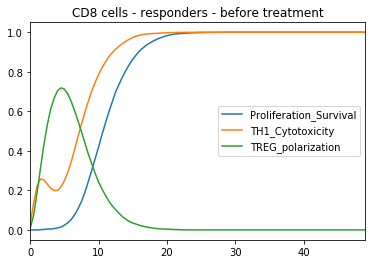

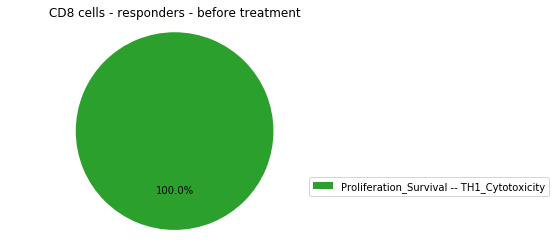

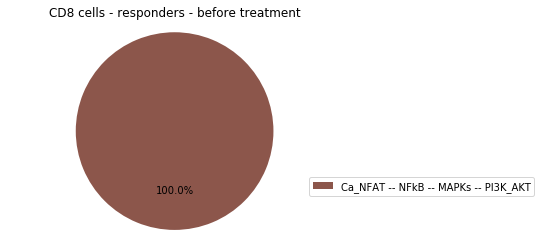

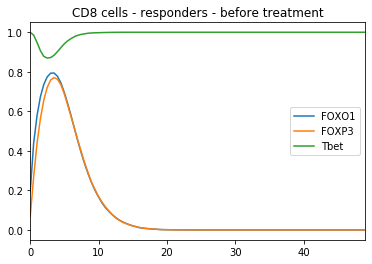

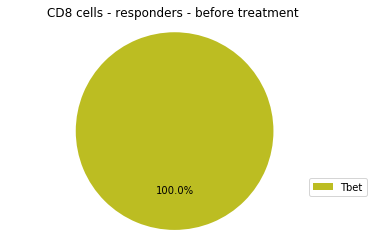

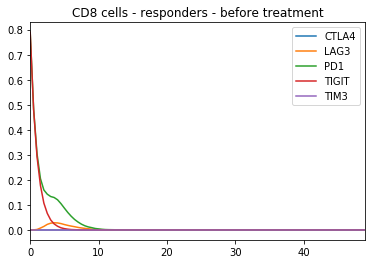

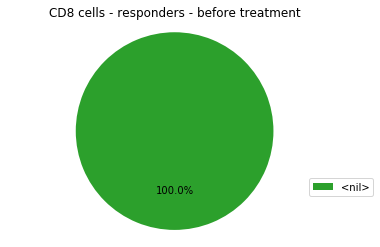

In [8]:
##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT_resp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
run_WT_resp.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD8 cells - responders - before treatment')

##### Visualize the pathways
# Select outputs for visualisation of the results
WT_resp.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
#run_WT_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD8 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD8 cells - responders - before treatment')

##### Visualize the TFs
# Select outputs for visualisation of the results
WT_resp.network.set_output(('Tbet','FOXP3','FOXO1'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
run_WT_resp.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD8 cells - responders - before treatment ')

##### Visualize the immune checkpoints
# Select outputs for visualisation of the results
WT_resp.network.set_output(('CTLA4','PD1','TIGIT','LAG3','TIM3'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
run_WT_resp.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD8 cells - responders - before treatment')


We set the initial conditions according to the gene expression status found in the differentially expressed gene analysis. If they are differentially expressed (between responders and non-responders), we set the value to 1 initially.
The results show that most of the cells are Th1 types when compared to the non-responders.  

#### 3. Simulation of anti-PD1 treatment for non-responders in CD8+ cells

Text(0.5, 1.0, 'CD8+ - anti-PD1 treatment - non responders')

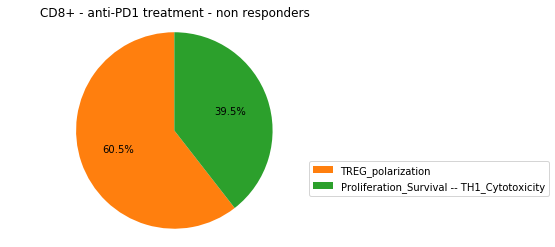

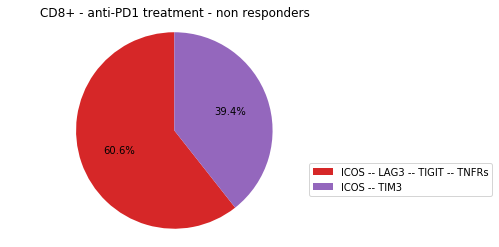

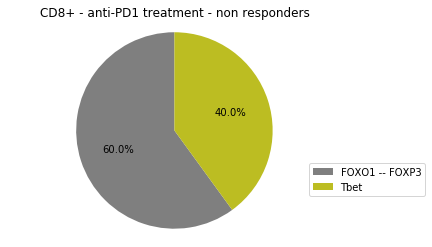

In [9]:
# Mutate PD1
mut_PD1_nonresp = WT_nonresp.copy()
mut_PD1_nonresp.mutate("PD1", "OFF")
mut_PD1_nonresp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_PD1_nonresp = mut_PD1_nonresp.run()
mutres_PD1_nonresp.plot_piechart()
plt.title('CD8+ - anti-PD1 treatment - non responders')

# Mutate PD1
mut_PD1_nonresp = WT_nonresp.copy()
mut_PD1_nonresp.mutate("PD1", "OFF")
mut_PD1_nonresp.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mutres_PD1_nonresp = mut_PD1_nonresp.run()
mutres_PD1_nonresp.plot_piechart()
plt.title('CD8+ - anti-PD1 treatment - non responders')
#mutres_PD1_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD8+ - anti-PD1 treatment - non responders')


# Mutate PD1
mut_PD1_nonresp = WT_nonresp.copy()
mut_PD1_nonresp.mutate("PD1", "OFF")
mut_PD1_nonresp.network.set_output(('FOXP3', 'FOXO1','Tbet'))
mutres_PD1_nonresp = mut_PD1_nonresp.run()
mutres_PD1_nonresp.plot_piechart()
plt.title('CD8+ - anti-PD1 treatment - non responders')
#mutres_PD1_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD8+ - anti-PD1 treatment - non responders')


#### 4. Simulation of anti-PD1 treatment for responders in CD8+ cells

Text(0.5, 1.0, 'CD8+ - anti-PD1 treatment - responders')

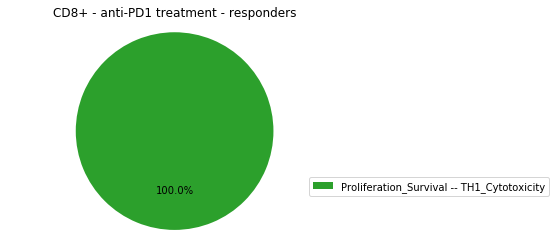

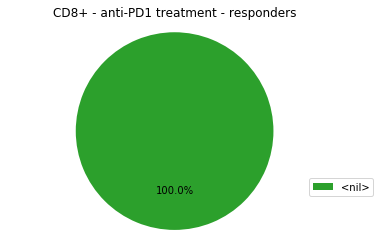

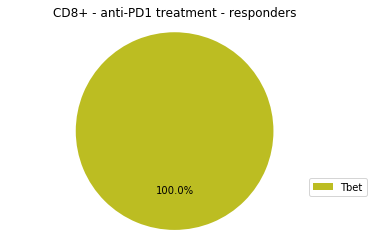

In [10]:
# Mutate PD1
mut_PD1_resp = WT_resp.copy()
mut_PD1_resp.mutate("PD1", "OFF")
mut_PD1_resp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_PD1_resp = mut_PD1_resp.run()
mutres_PD1_resp.plot_piechart()
plt.title('CD8+ - anti-PD1 treatment - responders')

# Mutate PD1
mut_PD1_resp = WT_resp.copy()
mut_PD1_resp.mutate("PD1", "OFF")
mut_PD1_resp.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mutres_PD1_resp = mut_PD1_resp.run()
mutres_PD1_resp.plot_piechart()
plt.title('CD8+ - anti-PD1 treatment - responders')
#mutres_PD1_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD8+ - anti-PD1 treatment - responders')


# Mutate PD1
mut_PD1_resp = WT_resp.copy()
mut_PD1_resp.mutate("PD1", "OFF")
mut_PD1_resp.network.set_output(('FOXP3', 'FOXO1','Tbet'))
mutres_PD1_resp = mut_PD1_resp.run()
mutres_PD1_resp.plot_piechart()
plt.title('CD8+ - anti-PD1 treatment - responders')
#mutres_PD1_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD8+ - anti-PD1 treatment - responders')


We check the double treatments in both responders and non-responders

Text(0.5, 1.0, 'CD4+ - anti-CTLA4 anti-PD1 treatment - responders')

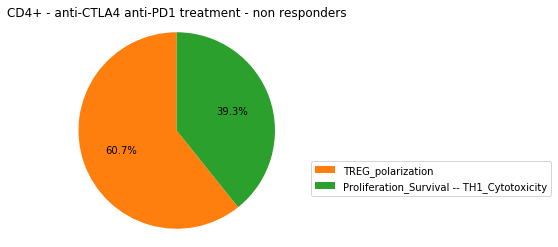

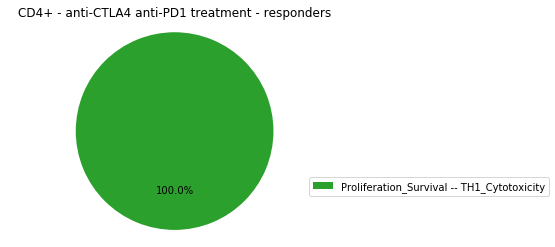

In [11]:
# Mutate PD1 and CTLA4
mut_CTLA4_PD1_nonresp = mut_PD1_nonresp.copy()
mut_CTLA4_PD1_nonresp.mutate("CTLA4", "OFF")
mut_CTLA4_PD1_nonresp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_CTLA4_PD1_nonresp = mut_CTLA4_PD1_nonresp.run()
mutres_CTLA4_PD1_nonresp.plot_piechart()
plt.title('CD4+ - anti-CTLA4 anti-PD1 treatment - non responders')


# Mutate PD1 and CTLA4
mut_CTLA4_PD1_resp = mut_PD1_resp.copy()
mut_CTLA4_PD1_resp.mutate("CTLA4", "OFF")
mut_CTLA4_PD1_resp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_CTLA4_PD1_resp = mut_CTLA4_PD1_resp.run()
mutres_CTLA4_PD1_resp.plot_piechart()
plt.title('CD4+ - anti-CTLA4 anti-PD1 treatment - responders')

#### 5. Simulation of for non-responders before treatment in CD4+ cells

In [12]:
### Simulation of the experiments for non-responders
WT_nonresp = maboss.copy_and_update_parameters(WT1, {'max_time':50})

WT_nonresp.network.set_istate('Antigen',[0,1])
WT_nonresp.network.set_istate('MHCI',[1,0])
WT_nonresp.network.set_istate('MHCII',[0,1])
WT_nonresp.network.set_istate('CD80_86',[0,1])

WT_nonresp.network.set_istate('TIM3_L',[0,1])
WT_nonresp.network.set_istate('LAG3_L',[0,1])
WT_nonresp.network.set_istate('TIGIT_L',[0,1])
WT_nonresp.network.set_istate('PD1_L',[0,1])
WT_nonresp.network.set_istate('TNFRs_L',[0,1])
WT_nonresp.network.set_istate('ICOS_L',[0,1])


Text(0.5, 1.0, 'CD4 cells - non responders - before treatment')

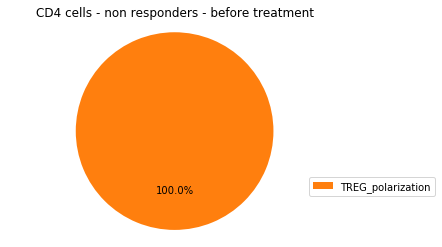

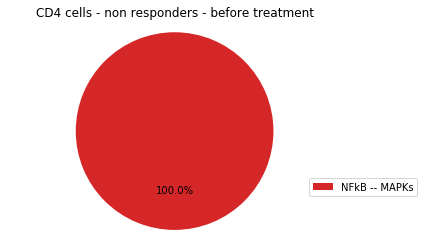

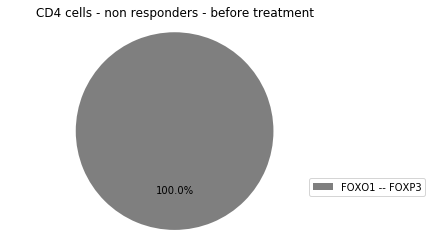

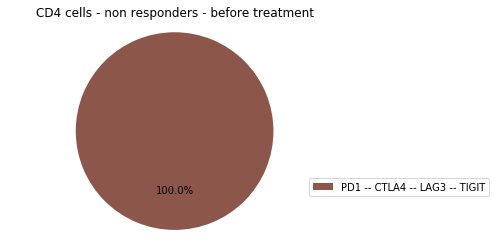

In [13]:
##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
#run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD4 cells - non responders - before treatment')

##### Visualize the pathways
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
#run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD4 cells - non responders - before treatment')

##### Visualize the TFs
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('Tbet','FOXP3','FOXO1'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
#run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD4 cells - non responders - before treatment')

##### Visualize the immune checkpoints
# Select outputs for visualisation of the results
WT_nonresp.network.set_output(('CTLA4','PD1','TIGIT','LAG3','TIM3'))
# Run the model
run_WT_nonresp = WT_nonresp.run()

# Plot the results 
#run_WT_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 cells - non responders - before treatment')
run_WT_nonresp.plot_piechart()
plt.title('CD4 cells - non responders - before treatment')

#### 6. Simulation of for responders before treatment in CD4+ cells

In [14]:
### Simulation of experiments for responders
WT_resp = maboss.copy_and_update_parameters(WT1, {'max_time':50})

# For all nodes of the network, set the initial state to random
#for n in WT_resp.network:
#    WT_resp.network.set_istate(n,[0.5,0.5])


WT_resp.network.set_istate('Antigen',[0,1])
WT_resp.network.set_istate('MHCI',[1,0])
WT_resp.network.set_istate('MHCII',[0,1])
WT_resp.network.set_istate('CD80_86',[0,1])

WT_resp.network.set_istate('TIM3_L',[1,0])
WT_resp.network.set_istate('LAG3_L',[0,1])
WT_resp.network.set_istate('TIGIT',[0,1])
WT_resp.network.set_istate('PD1_L',[0,1])
WT_resp.network.set_istate('PD1',[0,1])
WT_resp.network.set_istate('TNFRs',[0,1])
WT_resp.network.set_istate('ICOS',[0,1]) 
WT_resp.network.set_istate('IFNG',[0,1]) 
WT_resp.network.set_istate('IL12R',[0,1]) 
WT_resp.network.set_istate('STAT4',[0,1]) 
WT_resp.network.set_istate('Tbet',[0,1]) 
#WT_resp.network.set_istate('STAT1',[0,1])

Text(0.5, 1.0, 'CD4 cells - responders - before treatment')

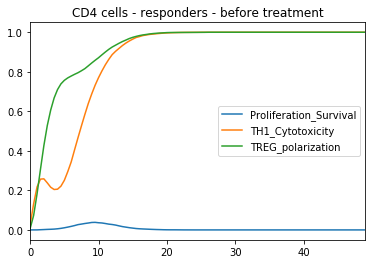

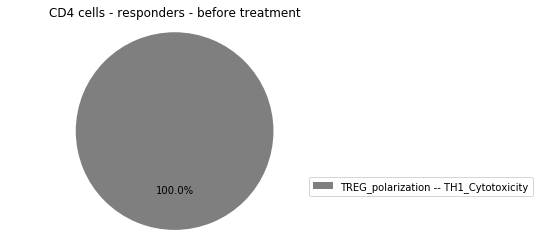

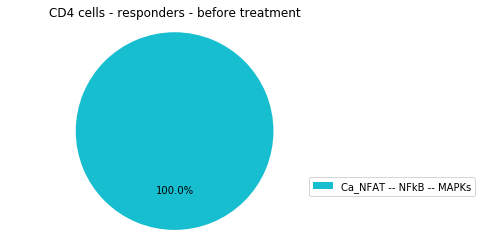

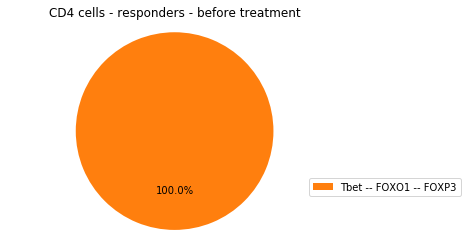

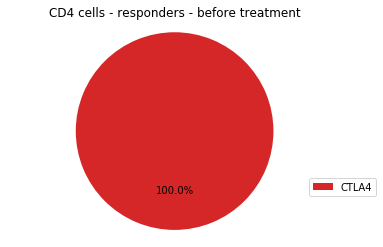

In [15]:
##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT_resp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
run_WT_resp.get_nodes_probtraj().plot(legend=True)
plt.title('CD4 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD4 cells - responders - before treatment')

##### Visualize the pathways
# Select outputs for visualisation of the results
WT_resp.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
#run_WT_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD4 cells - responders - before treatment')

##### Visualize the TFs
# Select outputs for visualisation of the results
WT_resp.network.set_output(('Tbet','FOXP3','FOXO1'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
#run_WT_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD4 cells - responders - before treatment')

##### Visualize the immune checkpoints
# Select outputs for visualisation of the results
WT_resp.network.set_output(('CTLA4','PD1','TIGIT','LAG3','TIM3'))
# Run the model
run_WT_resp = WT_resp.run()

# Plot the results 
#run_WT_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 cells - responders - before treatment')
run_WT_resp.plot_piechart()
plt.title('CD4 cells - responders - before treatment')

#### 7. Simulation of anti-PD1 treatment for non-responders in CD4+ cells

Text(0.5, 1.0, 'CD4+ - anti-PD1 treatment - non responders')

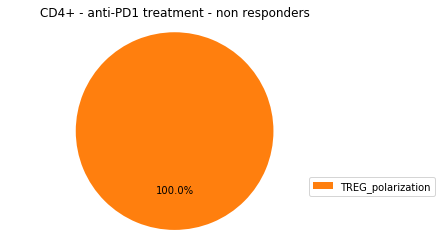

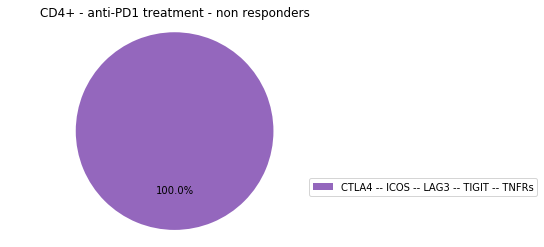

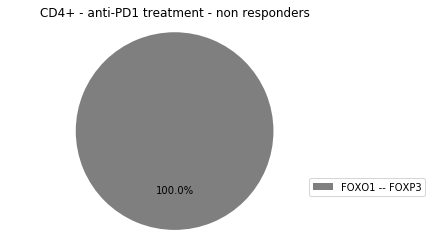

In [16]:
# Mutate PD1
mut_PD1_nonresp = WT_nonresp.copy()
mut_PD1_nonresp.mutate("PD1", "OFF")
mut_PD1_nonresp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_PD1_nonresp = mut_PD1_nonresp.run()
mutres_PD1_nonresp.plot_piechart()
plt.title('CD4+ - anti-PD1 treatment - non responders')

# Mutate PD1
mut_PD1_nonresp = WT_nonresp.copy()
mut_PD1_nonresp.mutate("PD1", "OFF")
mut_PD1_nonresp.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mutres_PD1_nonresp = mut_PD1_nonresp.run()
mutres_PD1_nonresp.plot_piechart()
plt.title('CD4+ - anti-PD1 treatment - non responders')
#mutres_PD1_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4+ - anti-PD1 treatment - non responders')


# Mutate PD1
mut_PD1_nonresp = WT_nonresp.copy()
mut_PD1_nonresp.mutate("PD1", "OFF")
mut_PD1_nonresp.network.set_output(('FOXP3', 'FOXO1','Tbet'))
mutres_PD1_nonresp = mut_PD1_nonresp.run()
mutres_PD1_nonresp.plot_piechart()
plt.title('CD4+ - anti-PD1 treatment - non responders')
#mutres_PD1_nonresp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4+ - anti-PD1 treatment')

#### 8. Simulation of anti-PD1 treatment for responders in CD4+ cells

Text(0.5, 1.0, 'CD4+ - anti-PD1 treatment - responders')

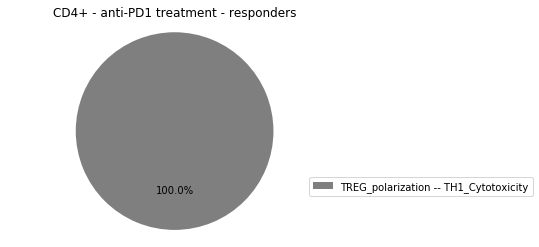

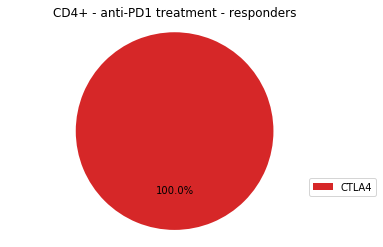

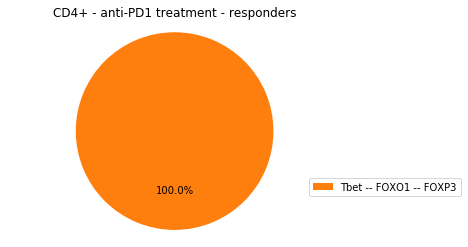

In [17]:
# Mutate PD1
mut_PD1_resp = WT_resp.copy()
mut_PD1_resp.mutate("PD1", "OFF")
mut_PD1_resp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_PD1_resp = mut_PD1_resp.run()
mutres_PD1_resp.plot_piechart()
plt.title('CD4+ - anti-PD1 treatment - responders')

# Mutate PD1
mut_PD1_resp = WT_resp.copy()
mut_PD1_resp.mutate("PD1", "OFF")
mut_PD1_resp.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mutres_PD1_resp = mut_PD1_resp.run()
mutres_PD1_resp.plot_piechart()
plt.title('CD4+ - anti-PD1 treatment - responders')
#mutres_PD1_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4+ - anti-PD1 treatment')


# Mutate PD1
mut_PD1_resp = WT_resp.copy()
mut_PD1_resp.mutate("PD1", "OFF")
mut_PD1_resp.network.set_output(('FOXP3', 'FOXO1','Tbet'))
mutres_PD1_resp = mut_PD1_resp.run()
mutres_PD1_resp.plot_piechart()
plt.title('CD4+ - anti-PD1 treatment - responders')
#mutres_PD1_resp.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4+ - anti-PD1 treatment - responders')

Text(0.5, 1.0, 'CD4+ - anti-CTLA4 anti-PD1 treatment - responders')

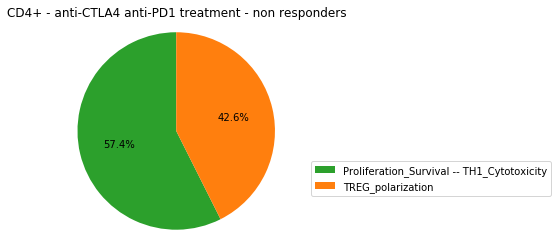

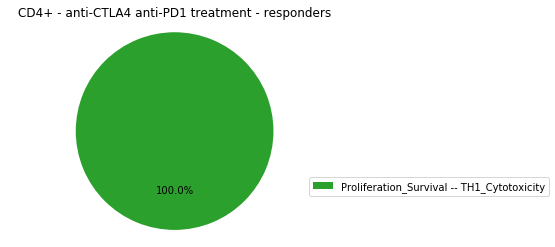

In [18]:
# Mutate PD1 and CTLA4
mut_CTLA4_PD1_nonresp = mut_PD1_nonresp.copy()
mut_CTLA4_PD1_nonresp.mutate("CTLA4", "OFF")
mut_CTLA4_PD1_nonresp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_CTLA4_PD1_nonresp = mut_CTLA4_PD1_nonresp.run()
mutres_CTLA4_PD1_nonresp.plot_piechart()
plt.title('CD4+ - anti-CTLA4 anti-PD1 treatment - non responders')


# Mutate PD1 and CTLA4
mut_CTLA4_PD1_resp = mut_PD1_resp.copy()
mut_CTLA4_PD1_resp.mutate("CTLA4", "OFF")
mut_CTLA4_PD1_resp.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
mutres_CTLA4_PD1_resp = mut_CTLA4_PD1_resp.run()
mutres_CTLA4_PD1_resp.plot_piechart()
plt.title('CD4+ - anti-CTLA4 anti-PD1 treatment - responders')